# Text Mining Assignment

In [1]:
 
import spacy 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import string
musk = pd.read_csv('Elon_musk.csv',
                   encoding='latin',
                   error_bad_lines = False)
musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
musk=musk['Text']
musk

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [4]:
# remove both the leading and the trailing characters
musk = [y.strip() for y in musk]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [5]:
# removes empty strings, because they are considered in Python as False
musk = [x for x in musk if x] 
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
# Joining the list into one string/text
text = ' '.join(musk)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [7]:
#Punctuation
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation)) 
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [8]:
#Tokenization
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',

In [9]:
text_tokens[0:72]

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed']

In [10]:
len(text_tokens)

21373

In [11]:
from nltk.corpus import stopwords

In [12]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just']


In [14]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [15]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [16]:
!python3 -m spacy download en_core_web_sm
import spacy

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
# NLP english language model of spacy library

nlp = spacy.load("en_core_web_sm")


In [18]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought


In [19]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations']


### Feature Extraction :

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [21]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,kunalb11,alien,idaacarmack,ray,trace,cyberpunk,hdr,nextlevel,have,try,...,dire,priority,surreal,propaganda,social,httpstcowjrzibkh1h,click,samwise,gamgee,altho
0,2695,231,2433,3615,4493,959,1670,3150,1665,4528,...,1075,3504,4248,3540,4031,2325,773,3816,1525,247


In [22]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
kunalb11,2695
alien,231
idaacarmack,2433
ray,3615
trace,4493
...,...
httpstcowjrzibkh1h,2325
click,773
samwise,3816
gamgee,1525


In [23]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

,0
ðogecoin,4964
zzcool,4963
zwiebelbach,4962
zubinanary,4961
zshauladventure,4960
zone,4959
zon,4958
zogfotpik,4957
zip2,4956
zikryzamir,4955


In [24]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

,0
005,0
10,1
100,2
1000,3
10000,4
107,5
10x,6
11,7
112,8
11thhour,9


In [25]:
print(vectorizer.vocabulary_)

{'kunalb11': 2695, 'alien': 231, 'idaacarmack': 2433, 'ray': 3615, 'trace': 4493, 'cyberpunk': 959, 'hdr': 1670, 'nextlevel': 3150, 'have': 1665, 'try': 4528, 'joerogan': 2615, 'spotify': 4111, 'great': 1604, 'interview': 2544, 'gtera27': 1623, 'doge': 1110, 'underestimate': 4661, 'teslacn': 4338, 'congratulations': 855, 'tesla': 4332, 'china': 739, 'amazing': 257, 'execution': 1320, 'last': 2715, 'year': 4932, 'now': 3190, 'next': 3149, 'even': 1292, 'happy': 1652, 'new': 3146, 'ox': 3307, 'httpstco9wfkmyu2oj': 1860, 'frodo': 1489, 'underdoge': 4660, 'all': 234, 'thought': 4417, 'would': 4907, 'fail': 1356, 'himself': 1716, 'httpstcozgxjfdzzrm': 2393, 'owensparks': 3304, 'flcnhvy': 1430, 'anonyx10': 286, 'haha': 1637, 'thanks': 4376, 'indeed': 2482, 'tweets': 4551, 'definitely': 1014, 'represent': 3699, 'realworld': 3641, 'time': 4436, 'allocation': 236, 'the': 4383, 'entertaining': 1248, 'outcome': 3284, 'likely': 2776, 'givedirectly': 1574, 'just': 2642, 'send': 3884, 'agree': 200, 

In [26]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(X.toarray().shape)

(16023, 4965)


#### Let's see how can bigrams and trigrams can be included here

In [28]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [29]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TFidf vectorizer :

In [30]:
#print(vectorizer_n_gram_max_features.get_feature_names())

In [31]:
#print(tf_idf_matrix_n_gram_max_features.toarray())

####  Generate wordcloud :

In [32]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    
    plt.figure(figsize=(60, 40))    # Set figure size

    
    plt.imshow(wordcloud)           # Display image
    
    
    plt.axis("off")                 # No axis details

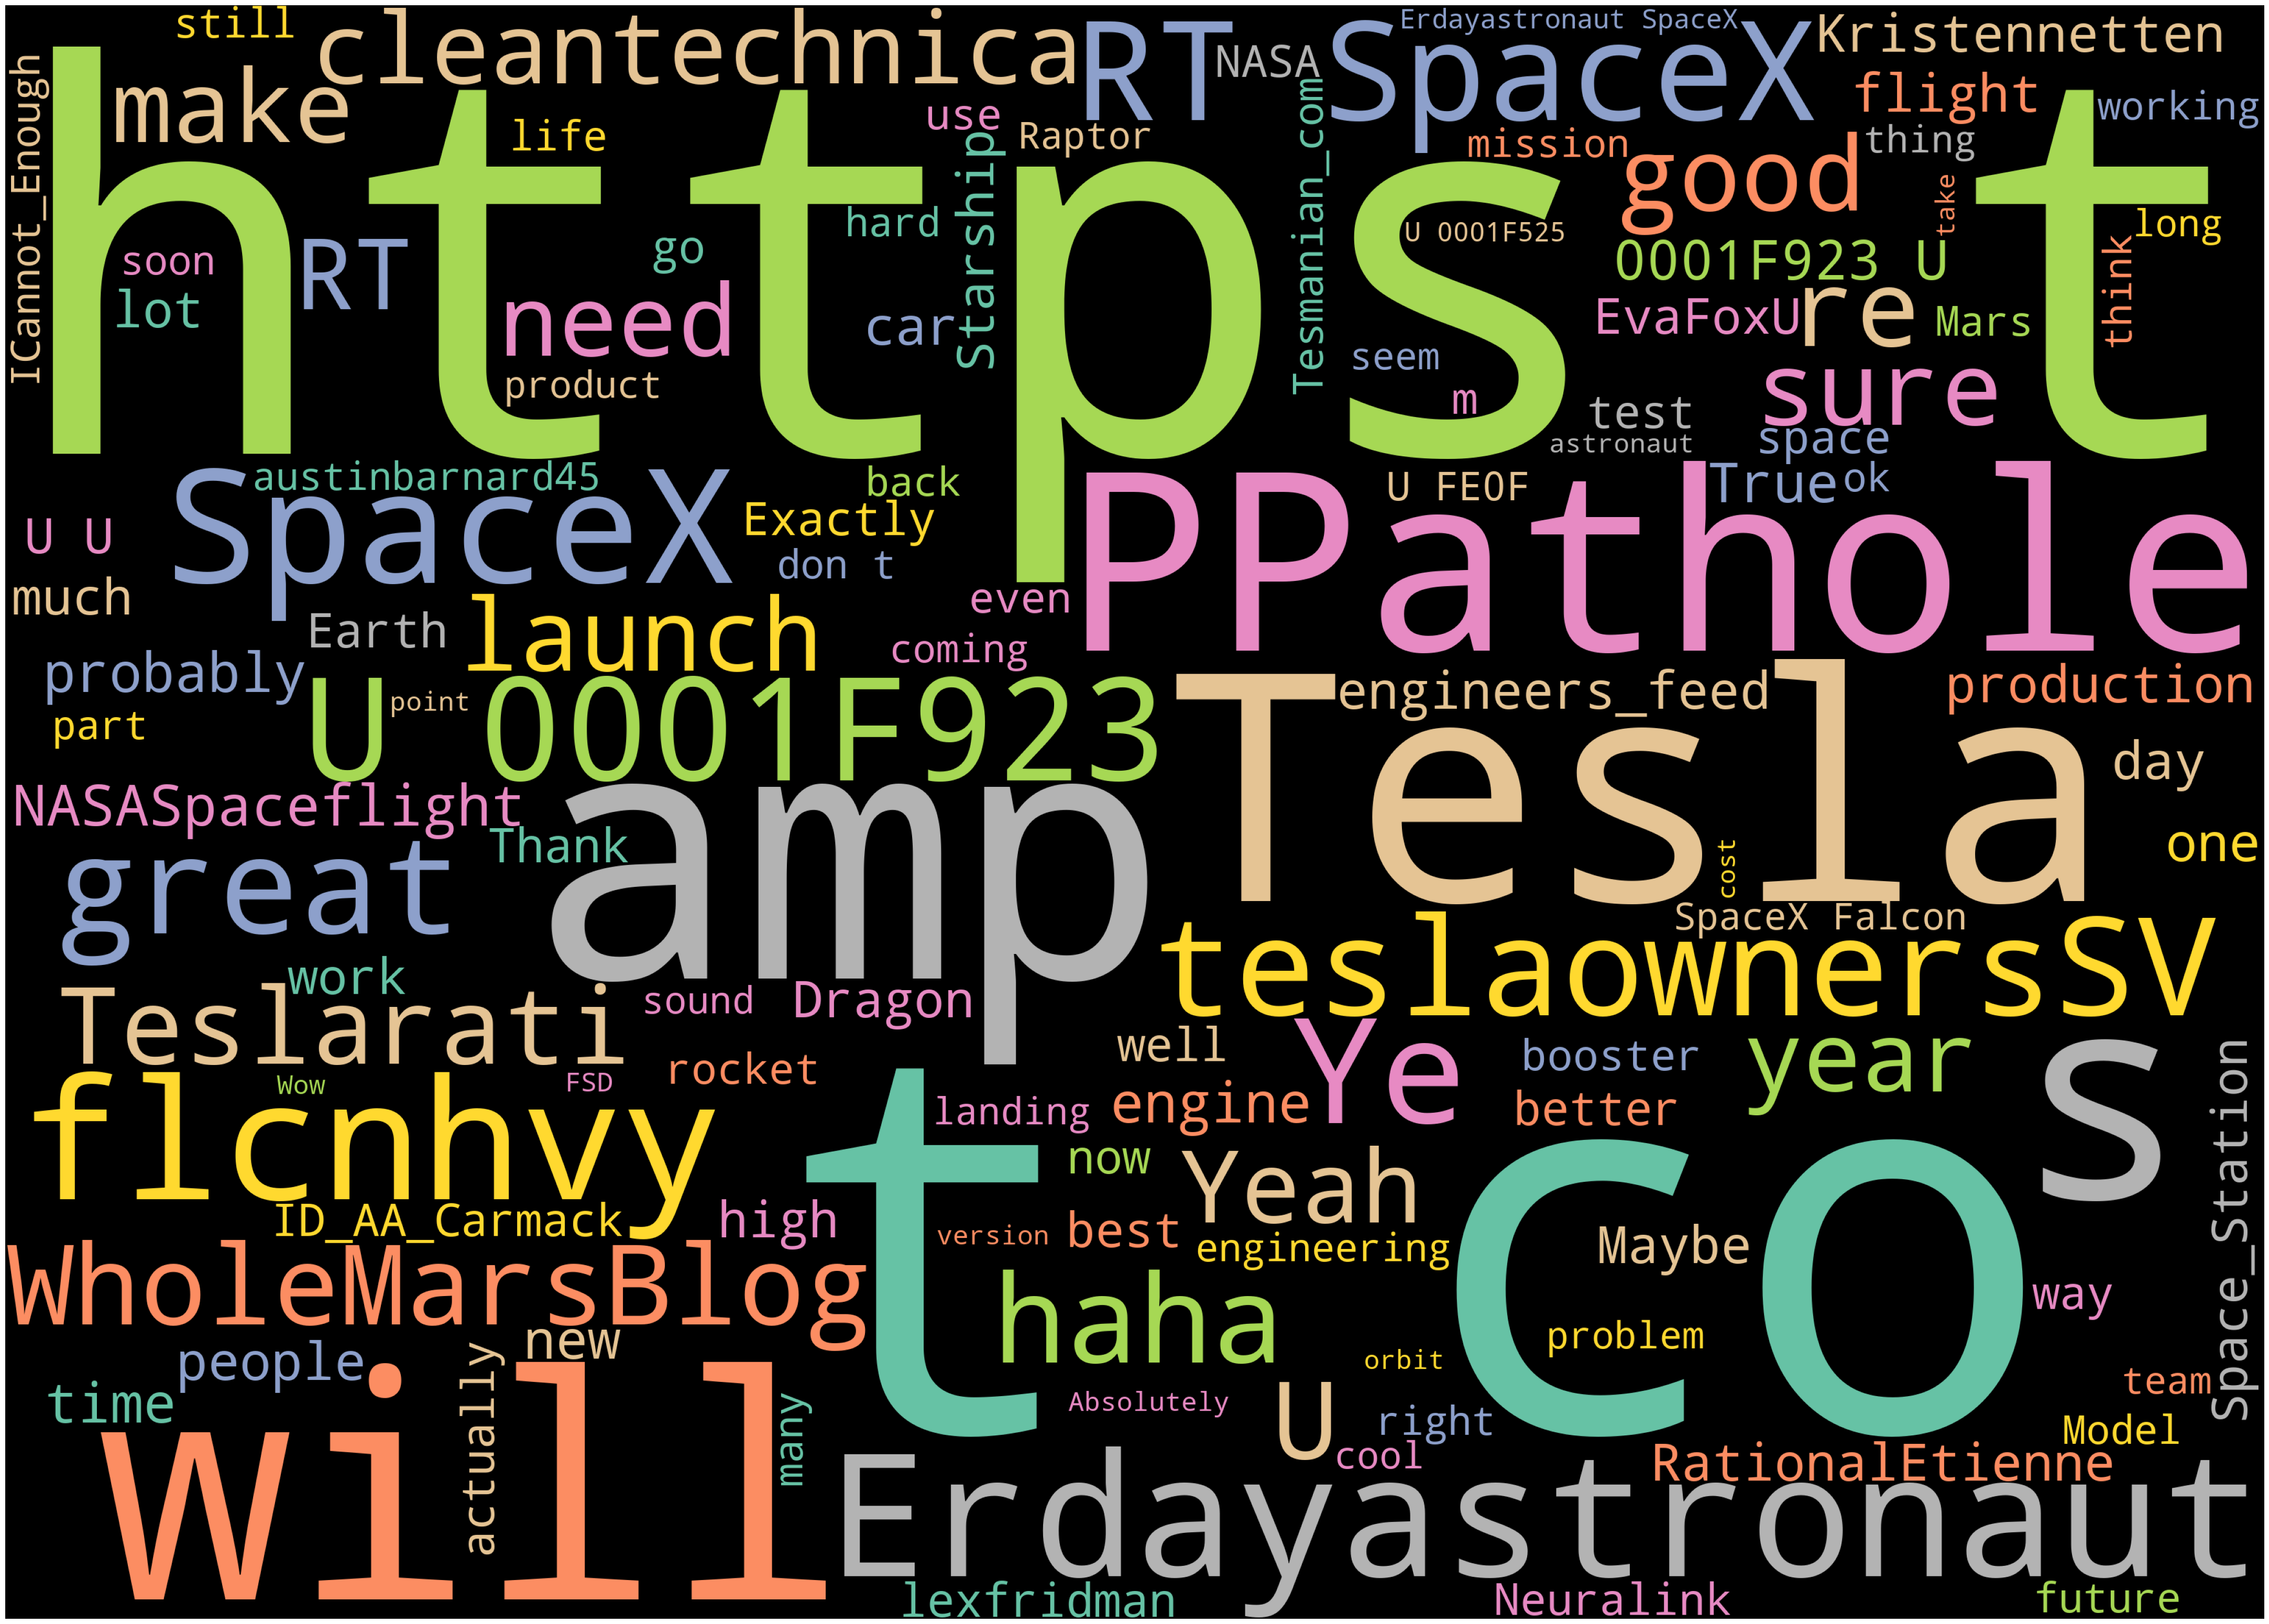

In [33]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [34]:
musk2 = pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines = False)
musk2

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [35]:
musk2 = musk2['Text']
musk2

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [36]:
musk2 = [x.strip() for x in musk2] # remove both the leading and the trailing characters
musk2 = [x for x in musk2 if x] # removes empty strings, because they are considered in Python as False
musk2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [37]:
one_block = musk2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [38]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [39]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [40]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['tracing', 'level', 'tried']

In [41]:
len(nouns_verbs)

3

In [42]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [43]:
X.shape

(3, 3)

In [44]:
X.toarray()

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [45]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1]], dtype=int64)

In [46]:
type(sum_words)

numpy.matrix

In [47]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [48]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

#### Emotion Mining :

In [49]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(musk2))

#sentences[5:15]
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [50]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [51]:
nlp = spacy.load('en_core_web_sm')

In [52]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

,sentence,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,13
1,Have you tried it?,4
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated @teslacn Congr...,13
4,Now on to the next for even more!!,8
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",11
923,"It may never pay out, as the stock cant b ht...",31
924,Details Aug 28.,3
925,AI symbiosis while u wait @vistacruiser7 @flcn...,47


In [53]:
sent_df['index'] = range(0, len(sent_df))

In [54]:
# PW for positive words 
# NW for Negative Words 

In [55]:
PW=pd.read_csv('positive-words.txt', 
               error_bad_lines = False)
PW

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [56]:
NW=pd.read_csv('negative-words.txt', 
               error_bad_lines = False,
               encoding='latin-1')
NW

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [57]:
PW =PW.iloc[25:]
PW =PW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
PW.reset_index(inplace=True)
PW =PW.drop('index',axis=1)
PW['Score'] = 1
PW

,Words,Score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [58]:
NW = NW.iloc[25:]
NW = NW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NW.reset_index(inplace=True)
NW = NW.drop('index',axis=1)
NW['Score'] = -1
NW

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [59]:
affinity_scores1 = PW.set_index('Words')['Score'].to_dict()
affinity_scores2 = NW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [60]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [61]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,13,0
1,Have you tried it?,4,1
2,@joerogan @Spotify Great interview!,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,13,3
4,Now on to the next for even more!!,8,4
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",11,922
923,"It may never pay out, as the stock cant b ht...",31,923
924,Details Aug 28.,3,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,47,925
